# Analysis of Test Coverage

This notebook is using the models we worked on in Simulation Test Coverage.ipnyb

In [1]:
using Revise

In [2]:
using ai_codev_study.Commons
using ai_codev_study.Models

In [3]:
using CSV, DataFrames, Turing, Distributions, StatsPlots

In [4]:
data = CSV.read("../../data/tasks_merged.csv", DataFrame)

79×48 DataFrame
 Row │ dev1     task1.ai  task1.codehealth  task1.coverage  task1.measured_tim ⋯
     │ String7  Bool      Float64           Float64         Int64              ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ anon126      true              8.34            0.74                 329 ⋯
   2 │ anon126      true              8.34            0.74                 329
   3 │ anon126      true              8.34            0.74                 329
   4 │ anon126      true              8.34            0.74                 329
   5 │ anon094      true              8.5             0.71                 660 ⋯
   6 │ anon126      true              8.88            0.91               46263
   7 │ anon126      true              8.88            0.91               46263
   8 │ anon126      true              8.88            0.91               46263
   9 │ anon126      true              8.88            0.91               46263 ⋯
  10 │ anon047      true              8.34            0.71                1320
  11 │ anon047      true              8.34            0.71                1320
  ⋮  │    ⋮        ⋮             ⋮                ⋮                  ⋮         ⋱
  70 │ anon017     false              8.23            0.7                52071
  71 │ anon080     false              8.41            0.56               11648 ⋯
  72 │ anon080     false              8.41            0.56               11648
  73 │ anon013     false              8.22            0.66                1827
  74 │ anon116     false              8.55            0.71                8861
  75 │ anon056     false              8.28            0.71                2087 ⋯
  76 │ anon124     false              8.27            0.7               555428
  77 │ anon019     false              8.38            0.71                1319
  78 │ anon019     false              8.38            0.71                1319
  79 │ anon019     false              8.38            0.71                1319 ⋯
                                                  44 columns and 58 rows omitted

In [5]:
selected_columns = ["task1.ai",
    "task1.ai_xp",
    "task1.entry_demo_5",
    "task1.coverage",
    "task2.coverage"]

5-element Vector{String}:
 "task1.ai"
 "task1.ai_xp"
 "task1.entry_demo_5"
 "task1.coverage"
 "task2.coverage"

In [6]:
selected_data = data[!,selected_columns]

79×5 DataFrame
 Row │ task1.ai  task1.ai_xp  task1.entry_demo_5  task1.coverage  task2.covera ⋯
     │ Bool      Int64        String15            Float64         Float64      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     true            5  Beginner                      0.74            0. ⋯
   2 │     true            5  Beginner                      0.74            0.
   3 │     true            5  Beginner                      0.74            0.
   4 │     true            5  Beginner                      0.74            0.
   5 │     true            5  Advanced                      0.71            0. ⋯
   6 │     true            5  Beginner                      0.91            0.
   7 │     true            5  Beginner                      0.91            0.
   8 │     true            5  Beginner                      0.91            0.
   9 │     true            5  Beginner                      0.91            0. ⋯
  10 │     true            5  Advanced                      0.71            0.
  11 │     true            5  Advanced                      0.71            0.
  ⋮  │    ⋮           ⋮               ⋮                 ⋮               ⋮      ⋱
  70 │    false            2  Intermediate                  0.7             0.
  71 │    false            2  Advanced                      0.56            0. ⋯
  72 │    false            2  Advanced                      0.56            0.
  73 │    false            1  Intermediate                  0.66            0.
  74 │    false            1  Advanced                      0.71            0.
  75 │    false            1  Advanced                      0.71            0. ⋯
  76 │    false            3  Intermediate                  0.7             0.
  77 │    false            1  Advanced                      0.71            0.
  78 │    false            1  Advanced                      0.71            0.
  79 │    false            1  Advanced                      0.71            0. ⋯
                                                    1 column and 58 rows omitted

In [7]:
complete_case = dropmissing(selected_data)

79×5 DataFrame
 Row │ task1.ai  task1.ai_xp  task1.entry_demo_5  task1.coverage  task2.covera ⋯
     │ Bool      Int64        String15            Float64         Float64      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     true            5  Beginner                      0.74            0. ⋯
   2 │     true            5  Beginner                      0.74            0.
   3 │     true            5  Beginner                      0.74            0.
   4 │     true            5  Beginner                      0.74            0.
   5 │     true            5  Advanced                      0.71            0. ⋯
   6 │     true            5  Beginner                      0.91            0.
   7 │     true            5  Beginner                      0.91            0.
   8 │     true            5  Beginner                      0.91            0.
   9 │     true            5  Beginner                      0.91            0. ⋯
  10 │     true            5  Advanced                      0.71            0.
  11 │     true            5  Advanced                      0.71            0.
  ⋮  │    ⋮           ⋮               ⋮                 ⋮               ⋮      ⋱
  70 │    false            2  Intermediate                  0.7             0.
  71 │    false            2  Advanced                      0.56            0. ⋯
  72 │    false            2  Advanced                      0.56            0.
  73 │    false            1  Intermediate                  0.66            0.
  74 │    false            1  Advanced                      0.71            0.
  75 │    false            1  Advanced                      0.71            0. ⋯
  76 │    false            3  Intermediate                  0.7             0.
  77 │    false            1  Advanced                      0.71            0.
  78 │    false            1  Advanced                      0.71            0.
  79 │    false            1  Advanced                      0.71            0. ⋯
                                                    1 column and 58 rows omitted

Complete case analysis doesn't drop any rows. Good!

# Models

We'll use Fractional Logistic Regression, which is basically a regression on the logit of the test coverage. Taking the logit re-maps the test coverage on a scale $]0;\infty[$. 

Let's see what is the resulting distribution, if it looks normal-ish, we can use regular regression (even thought the interpretation of coefficients is a bit tricky.)

In [8]:
complete_case[!,"task1.logit_coverage"] = Commons.logit.(complete_case[!,"task1.coverage"])
complete_case[!,"task2.logit_coverage"] = Commons.logit.(complete_case[!,"task2.coverage"])

79-element Vector{Float64}:
 0.9946225751440619
 1.0986122886681098
 0.9946225751440619
 2.1972245773362196
 0.8953840470548413
 0.9946225751440619
 1.0986122886681098
 0.9946225751440619
 2.1972245773362196
 0.9444616088408513
 0.8953840470548413
 0.9444616088408513
 0.8001193001121129
 ⋮
 0.8472978603872034
 0.8001193001121129
 0.708185057924486
 0.6190392084062236
 0.3639653772014115
 0.6632942174102643
 1.0459685551826876
 0.8472978603872034
 0.8001193001121129
 0.9444616088408513
 0.8953840470548413
 0.8953840470548413

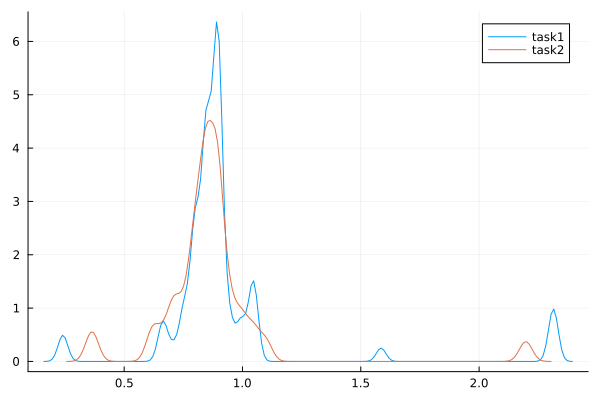

In [9]:
density(complete_case[!,"task1.logit_coverage"], label="task1")
density!(complete_case[!,"task2.logit_coverage"], label="task2")

## Model 1

Considering only `ai_use`. 

In [10]:
model_0 = Models.test_coverage_analysis(
    complete_case[!,"task1.ai"],
    complete_case[!,"task2.logit_coverage"])

DynamicPPL.Model{typeof(ai_codev_study.Models.test_coverage_analysis), (:ai_use, :logit_test_coverage), (), (), Tuple{Vector{Bool}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.test_coverage_analysis, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], logit_test_coverage = [0.9946225751440619, 1.0986122886681098, 0.9946225751440619, 2.1972245773362196, 0.8953840470548413, 0.9946225751440619, 1.0986122886681098, 0.9946225751440619, 2.1972245773362196, 0.9444616088408513  …  0.708185057924486, 0.6190392084062236, 0.3639653772014115, 0.6632942174102643, 1.0459685551826876, 0.8472978603872034, 0.8001193001121129, 0.9444616088408513, 0.8953840470548413, 0.8953840470548413]), NamedTuple(), DynamicPPL.DefaultContext())

In [11]:
chain_0 = sample(model_0, NUTS(), MCMCSerial(), 2000, 4)

┌ Info: Found initial step size
└   ϵ = 0.4
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:01
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
└   ϵ = 0.4
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:00


Chains MCMC chain (2000×15×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 19.44 seconds
Compute duration  = 16.62 seconds
parameters        = intercept, effect_ai, sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

   intercept    0.8107    0.0438    0.0007   3949.0925   4533.6743    1.0007   ⋯
   effect_ai    0.1016    0.0589    0.0010   3528.2527   3872.4006    1.0007   ⋯
       sigma    0.2566    0.0214    0.0003   5594.0255   5346.8430    1.0006   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0% 

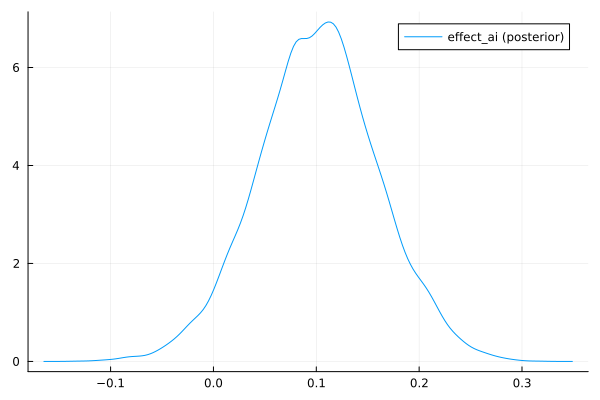

In [12]:
density(chain_0[:effect_ai] |> vec,
    label="effect_ai (posterior)")

We see a mildly positive effect. We will investigate further with simulations, to see what this really means.

In [13]:
Commons.credibility_interval(chain_0[:effect_ai], 0.95)

2-element Vector{Float64}:
 -0.02
  0.22

## Model with controls

We add more controls to see how they affect the estimated effect of AI.

In [14]:
model_1 = Models.test_coverage_analysis_with_controls(
    complete_case[!,"task1.ai"], 
    complete_case[!,"task1.ai_xp"], 
    Commons.dev1_skill_to_indexes(complete_case[!,"task1.entry_demo_5"]),
    complete_case[!,"task2.logit_coverage"])

DynamicPPL.Model{typeof(ai_codev_study.Models.test_coverage_analysis_with_controls), (:ai_use, :ai_xp, :dev1_skill, :logit_test_coverage, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Float64}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.test_coverage_analysis_with_controls, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], logit_test_coverage = [0.9946225751440619, 1.0986122886681098, 0.9946225751440619, 2.1972245773362196, 0.8953840470548413, 0.9946225751440619, 1.0986122886681098, 0.9946225751440619, 2.1972245773362196, 0.9444616088408513  …  0.708185057924486, 0.6190392084062236, 0.3639653772014115, 0.6632942174102643, 1.0459685551826876, 0.8472978603872034, 0.8001193001121129, 0.9444616088408513, 0.

In [15]:
chain_1 = sample(model_1, NUTS(), MCMCSerial(), 2000, 4)

┌ Info: Found initial step size
└   ϵ = 0.05
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.00625
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:04


Chains MCMC chain (2000×25×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 32.35 seconds
Compute duration  = 29.43 seconds
parameters        = intercept, effect_ai, sigma_interactions, effect_ai_xp_z[1], effect_ai_xp_z[2], effect_ai_xp_z[3], effect_ai_xp_z[4], effect_ai_xp_z[5], sigma_effect_skill, effect_dev1_skill_z[1], effect_dev1_skill_z[2], effect_dev1_skill_z[3], logit_sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
              parameters      mean       std      mcse    ess_bulk    ess_tail ⋯
                  Symbol   Float64   Float64   Float64     Float64     Float64 ⋯

               intercept    0.8581    0.0978    0.0022   2110.5420   2040.8783 ⋯
               effect_ai   -0.0158    0.1351    0.0044   1047.9618    563.

In [16]:
ess_rhat(chain_1)

ESS/R-hat
              parameters         ess      rhat   ess_per_sec 
                  Symbol     Float64   Float64       Float64 

               intercept   2110.5420    1.0014       71.7164
               effect_ai   1047.9618    1.0025       35.6098
      sigma_interactions   1831.2449    1.0017       62.2259
       effect_ai_xp_z[1]   5210.0839    1.0000      177.0391
       effect_ai_xp_z[2]   4839.8805    1.0014      164.4596
       effect_ai_xp_z[3]   3199.7463    1.0006      108.7277
       effect_ai_xp_z[4]   1797.0307    1.0012       61.0633
       effect_ai_xp_z[5]   2020.3559    1.0005       68.6519
      sigma_effect_skill   2492.5287    1.0020       84.6963
  effect_dev1_skill_z[1]   2552.9927    1.0012       86.7509
  effect_dev1_skill_z[2]   2897.7921    1.0009       98.4672
  effect_dev1_skill_z[3]   2742.2503    1.0019       93.1819
             logit_sigma   2721.0990    1.0012       92.4632


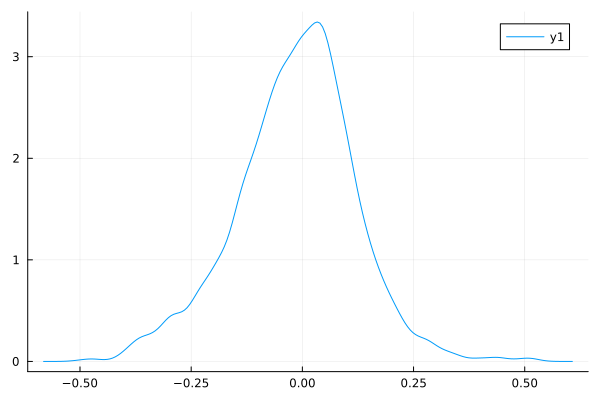

In [17]:
density(chain_1[:effect_ai] |> vec)

In [18]:
Commons.credibility_interval(chain_1[:effect_ai], 0.95)

2-element Vector{Float64}:
 -0.31
  0.24

Based on this, we don't see a significant effect due to using AI. The effect we saw with Model 0 could be due to slight differences in the two population that is not related to AI usage. 

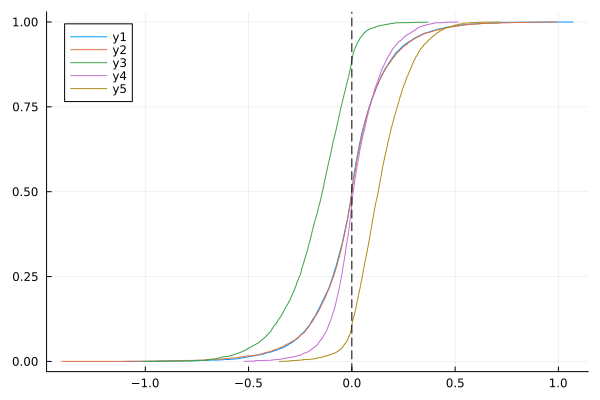

In [19]:
p = plot() 

for ai_xp in 1:5
    ecdfplot!(p, vec(chain_1["effect_ai_xp_z[$ai_xp]"] .* chain_1["sigma_interactions"]))
end

Commons.plotzero!(p)

When we look at the effects of ai_xp, we don't see major differences between them. Perhaps a level 3 is a bit lower than expected, and level 5 a bit higher? 

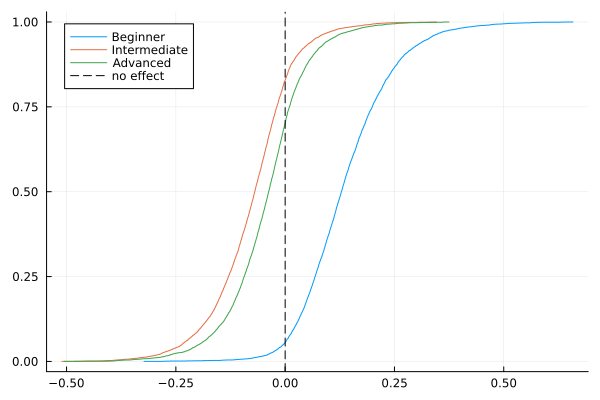

In [20]:
p = plot()


for dev1_skill in 1:3
    
    effect = chain_1["effect_dev1_skill_z[$dev1_skill]"] .* chain_1["sigma_effect_skill"]
    labels = ["Beginner", "Intermediate", "Advanced"]
    
    ecdfplot!(p,effect |> vec, label=labels[dev1_skill])

end

vline!([0], color=:black, style=:dash, label="no effect")

p

As we can see in this plot, on the other hand, that beginner developers tend to care about test coverage more than intermediate and advanced developers. (The cumulative posterior curve is on the right of zero).

In [21]:
combine(groupby(complete_case, ["task1.entry_demo_5", "task1.ai"]), "task2.coverage" => length)

6×3 DataFrame
 Row │ task1.entry_demo_5  task1.ai  task2.coverage_length 
     │ String15            Bool      Int64                 
─────┼─────────────────────────────────────────────────────
   1 │ Beginner               false                      1
   2 │ Beginner                true                     14
   3 │ Advanced               false                     24
   4 │ Advanced                true                     14
   5 │ Intermediate           false                     10
   6 │ Intermediate            true                     16

We see that the cohort using AI had more people who were beginners, while the cohort who didn't, had more developers who were advanced, so it seems that it's the level of the developers which explains the difference, not the use of AI.

# Monotonic Effects

In [22]:
model_2 = Models.test_coverage_analysis_with_controls_2(
    complete_case[!,"task1.ai"], 
    complete_case[!,"task1.ai_xp"], 
    Commons.dev1_skill_to_indexes(complete_case[!,"task1.entry_demo_5"]),
    complete_case[!,"task2.logit_coverage"])

DynamicPPL.Model{typeof(ai_codev_study.Models.test_coverage_analysis_with_controls_2), (:ai_use, :ai_xp, :dev1_skill, :logit_test_coverage, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Float64}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.test_coverage_analysis_with_controls_2, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], logit_test_coverage = [0.9946225751440619, 1.0986122886681098, 0.9946225751440619, 2.1972245773362196, 0.8953840470548413, 0.9946225751440619, 1.0986122886681098, 0.9946225751440619, 2.1972245773362196, 0.9444616088408513  …  0.708185057924486, 0.6190392084062236, 0.3639653772014115, 0.6632942174102643, 1.0459685551826876, 0.8472978603872034, 0.8001193001121129, 0.9444616088408513

In [23]:
chain_2 = sample(model_2, NUTS(), MCMCSerial(), 4000, 4)

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:05
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:05
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:05
┌ Info: Found initial step size
└   ϵ = 0.05
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:05


Chains MCMC chain (4000×24×4 Array{Float64, 3}):

Iterations        = 1001:1:5000
Number of chains  = 4
Samples per chain = 4000
Wall duration     = 34.41 seconds
Compute duration  = 32.32 seconds
parameters        = intercept, effect_ai, effect_ai_xp_factor[1], effect_ai_xp_factor[2], effect_ai_xp_factor[3], effect_ai_xp_factor[4], effect_ai_xp_factor[5], effect_skill, effect_skill_factor[1], effect_skill_factor[2], effect_skill_factor[3], logit_sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
              parameters      mean       std      mcse     ess_bulk     ess_ta ⋯
                  Symbol   Float64   Float64   Float64      Float64      Float ⋯

               intercept    1.1201    0.2193    0.0037    4693.0287    3761.34 ⋯
               effect_ai    0.1034    0.0783    0.0007   11131.0294   11369

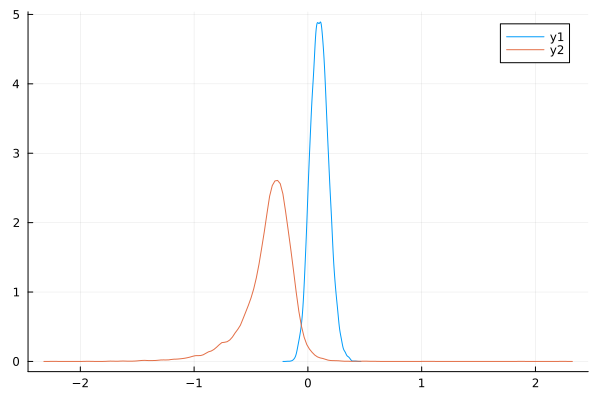

In [24]:
density(chain_2[:effect_ai] |> vec)
density!(chain_2[:effect_skill] |> vec)

We don't see a significant effect, even with high AI skill.

In [25]:
Commons.posterior_summary(chain_2[:effect_ai])

(mean = 0.1, interval_95 = [-0.04, 0.26])

In [26]:
Commons.posterior_summary(chain_2[:effect_skill] .* (1 .- chain_2["effect_skill_factor[1]"]))

(mean = -0.2, interval_95 = [-0.36, -0.02])

It seems that: 

1. AI doesn't have much of an effect on Test Coverage
2. Compared to a "beginner", an "advanced" developer will have a tendency to have *less* test coverage.

# Predictions

In [27]:
model_2_predict = Models.test_coverage_analysis_with_controls_2(
    # complete_case[!,"task1.ai"], 
    # Commons.ai_xp_to_indexes(complete_case[!,"task1.ai_xp"]), 
    # Commons.dev1_skill_to_indexes(complete_case[!,"task1.entry_demo_5"]),
    # similar(complete_case[!,"task2.logit_coverage"], Missing))
    [0, 1], 
    [3, 3], 
    [3, 3],
    fill(missing, 1, 2))

DynamicPPL.Model{typeof(ai_codev_study.Models.test_coverage_analysis_with_controls_2), (:ai_use, :ai_xp, :dev1_skill, :logit_test_coverage, :prior_effect_ai), (), (), Tuple{Vector{Int64}, Vector{Int64}, Vector{Int64}, Matrix{Missing}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.test_coverage_analysis_with_controls_2, (ai_use = [0, 1], ai_xp = [3, 3], dev1_skill = [3, 3], logit_test_coverage = [missing missing], prior_effect_ai = Normal{Float64}(μ=0.0, σ=1.0)), NamedTuple(), DynamicPPL.DefaultContext())

In [28]:
predictions_ai = predict(model_2_predict, chain_2)

Chains MCMC chain (4000×2×4 Array{Float64, 3}):

Iterations        = 1:1:4000
Number of chains  = 4
Samples per chain = 4000
parameters        = logit_test_coverage[1], logit_test_coverage[2]
internals         = 

Summary Statistics
              parameters      mean       std      mcse     ess_bulk     ess_ta ⋯
                  Symbol   Float64   Float64   Float64      Float64      Float ⋯

  logit_test_coverage[1]    0.7765    0.2452    0.0019   16309.0532   15708.93 ⋯
  logit_test_coverage[2]    0.8193    0.2426    0.0019   15966.9547   15721.36 ⋯
                                                               3 columns omitted

Quantiles
              parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
                  Symbol   Float64   Float64   Float64   Float64   Float64 

  logit_test_coverage[1]    0.2933    0.6113    0.7781    0.9419    1.2596
  logit_test_coverage[2]    0.3417    0.6568    0.8215    0.9829    1.2963


In [29]:
# We extract the mean predicted values!
gen_ai_comparison = generated_quantities(model_2_predict, chain_2)

4000×4 Matrix{Vector{Float64}}:
 [0.69396, 0.69927]    [0.685076, 0.700847]  …  [0.684094, 0.697454]
 [0.670733, 0.68866]   [0.669401, 0.679564]     [0.683088, 0.695276]
 [0.692626, 0.703693]  [0.690606, 0.695365]     [0.673332, 0.685675]
 [0.671988, 0.695382]  [0.686919, 0.696563]     [0.702483, 0.705933]
 [0.683865, 0.689014]  [0.691333, 0.693544]     [0.666514, 0.6772]
 [0.692025, 0.69698]   [0.679736, 0.68005]   …  [0.680142, 0.682333]
 [0.686371, 0.691417]  [0.68797, 0.686197]      [0.682693, 0.680725]
 [0.686826, 0.690409]  [0.68564, 0.69568]       [0.69066, 0.704534]
 [0.690806, 0.698316]  [0.680426, 0.69949]      [0.670275, 0.679938]
 [0.685369, 0.692102]  [0.679566, 0.683767]     [0.681837, 0.693596]
 [0.67912, 0.688348]   [0.689998, 0.692549]  …  [0.678491, 0.700274]
 [0.693552, 0.703711]  [0.674228, 0.678518]     [0.684085, 0.689396]
 [0.672275, 0.680839]  [0.674792, 0.697875]     [0.692114, 0.702902]
 ⋮                                           ⋱  
 [0.69485, 0.697508]   [0

In [30]:
gen_ai_comp_m = reduce(hcat, vec(gen_ai_comparison))'

Commons.posterior_summary((gen_ai_comp_m[:,2] .- gen_ai_comp_m[:,1]) .* 100)

(mean = 0.92, interval_95 = [-0.55, 2.64])

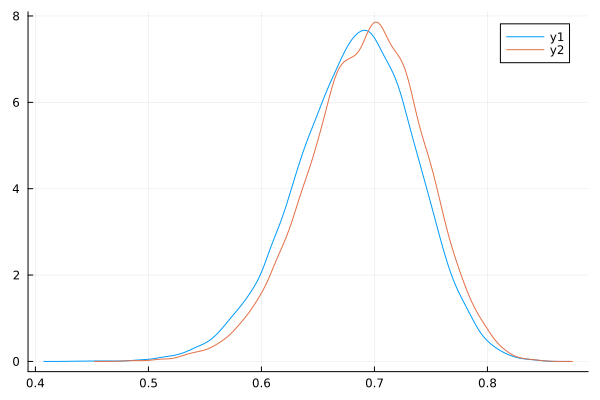

In [31]:
density(vec(Commons.logistic.(predictions_ai["logit_test_coverage[1]"])))
density!(vec(Commons.logistic.(predictions_ai["logit_test_coverage[2]"])))

We don't see much of an effect.

In [32]:
with_ai = vec(Commons.logistic.(predictions_ai["logit_test_coverage[2]"]))
without_ai = vec(Commons.logistic.(predictions_ai["logit_test_coverage[1]"]))

16000-element Vector{Float64}:
 0.7087864513162196
 0.6905015213430092
 0.6404236411371641
 0.6053139287054102
 0.6756246796299135
 0.6794476622262471
 0.7190695592675086
 0.6344672943761418
 0.7165509814141667
 0.5270026976879217
 0.7001895531928132
 0.6563968988975698
 0.6879179995517888
 ⋮
 0.5646278360472319
 0.706893176822117
 0.7213195487764664
 0.6835926098318866
 0.6977974672429271
 0.7208410474936824
 0.6369555941920834
 0.7026839442517558
 0.7124210343468241
 0.6322423168670142
 0.7558242727533483
 0.6595006435958706

In [33]:
Commons.posterior_summary(with_ai .- without_ai)

(mean = 0.01, interval_95 = [-0.13, 0.15])

## Looking at skill

In [34]:
model_2_predict_skill =  Models.test_coverage_analysis_with_controls_2(
    [0, 0], 
    [3, 3], 
    [1, 3],
    [missing, missing])

DynamicPPL.Model{typeof(ai_codev_study.Models.test_coverage_analysis_with_controls_2), (:ai_use, :ai_xp, :dev1_skill, :logit_test_coverage, :prior_effect_ai), (), (), Tuple{Vector{Int64}, Vector{Int64}, Vector{Int64}, Vector{Missing}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.test_coverage_analysis_with_controls_2, (ai_use = [0, 0], ai_xp = [3, 3], dev1_skill = [1, 3], logit_test_coverage = [missing, missing], prior_effect_ai = Normal{Float64}(μ=0.0, σ=1.0)), NamedTuple(), DynamicPPL.DefaultContext())

In [35]:
predictions_skill = predict(model_2_predict_skill, chain_2)

Chains MCMC chain (4000×2×4 Array{Float64, 3}):

Iterations        = 1:1:4000
Number of chains  = 4
Samples per chain = 4000
parameters        = logit_test_coverage[1], logit_test_coverage[2]
internals         = 

Summary Statistics
              parameters      mean       std      mcse     ess_bulk     ess_ta ⋯
                  Symbol   Float64   Float64   Float64      Float64      Float ⋯

  logit_test_coverage[1]    0.9731    0.2595    0.0021   15773.8300   15765.94 ⋯
  logit_test_coverage[2]    0.7744    0.2439    0.0019   16010.9142   15881.83 ⋯
                                                               3 columns omitted

Quantiles
              parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
                  Symbol   Float64   Float64   Float64   Float64   Float64 

  logit_test_coverage[1]    0.4567    0.8001    0.9762    1.1459    1.4773
  logit_test_coverage[2]    0.2873    0.6133    0.7732    0.9373    1.2554


In [36]:
gen_skill_comparison = let
    g = generated_quantities(model_2_predict_skill, chain_2)
    m = reduce(hcat, vec(g))'
end

16000×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.681348  0.69396
 0.705151  0.670733
 0.714792  0.692626
 0.688503  0.671988
 0.731455  0.683865
 0.734406  0.692025
 0.734018  0.686371
 0.725638  0.686826
 0.750693  0.690806
 0.703349  0.685369
 0.730826  0.67912
 0.735434  0.693552
 0.719375  0.672275
 ⋮         
 0.738084  0.670515
 0.707533  0.691682
 0.715474  0.690238
 0.707255  0.67596
 0.720337  0.672817
 0.723732  0.684709
 0.725723  0.684953
 0.700999  0.683515
 0.727871  0.680475
 0.716245  0.688692
 0.741767  0.683955
 0.719393  0.691234

In [37]:
pred_with_skill = vec(Commons.logistic.(predictions_skill["logit_test_coverage[2]"]))

pred_without_skill = vec(Commons.logistic.(predictions_skill["logit_test_coverage[1]"]))

16000-element Vector{Float64}:
 0.6999577532327419
 0.7718421199912981
 0.7985103196949751
 0.7174321377952323
 0.7905007437329681
 0.6405827058526999
 0.8208154681082068
 0.7874490487776014
 0.7661317007633494
 0.737631688401902
 0.6780408318642107
 0.7771436114985852
 0.7099883416811774
 ⋮
 0.7714160040194009
 0.6879880508765523
 0.6670599967304937
 0.553428333044654
 0.7939574837831831
 0.6023386933434998
 0.7053295642759998
 0.6438805492845707
 0.7350085952504524
 0.6983030002240944
 0.7468172223395553
 0.7826204382558928

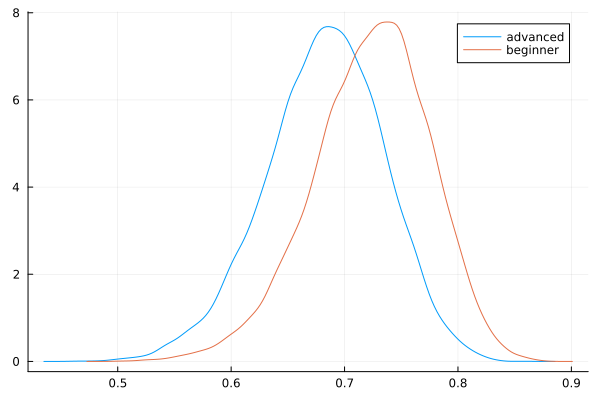

In [38]:
density(pred_with_skill, label="advanced")
density!(pred_without_skill, label="beginner")

In [41]:
Commons.posterior_summary((gen_skill_comparison[:,2] .- gen_skill_comparison[:,1]))

(mean = -0.04, interval_95 = [-0.07, -0.0])

In [42]:
Commons.posterior_summary(pred_with_skill .- pred_without_skill)

(mean = -0.04, interval_95 = [-0.18, 0.1])

Skilled developers have -4 percentage points compared to beginners.

# Sensitivity Analysis

We try with different priors.

In [44]:
complete_case[!,"task1.logit_coverage"] |> std

0.35499493854499703

In [45]:
model_2_optimistic = Models.test_coverage_analysis_with_controls_2(
    complete_case[!,"task1.ai"], 
    complete_case[!,"task1.ai_xp"], 
    Commons.dev1_skill_to_indexes(complete_case[!,"task1.entry_demo_5"]),
    complete_case[!,"task2.logit_coverage"], 
    Normal(0.25, 0.5))

DynamicPPL.Model{typeof(ai_codev_study.Models.test_coverage_analysis_with_controls_2), (:ai_use, :ai_xp, :dev1_skill, :logit_test_coverage, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Float64}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.test_coverage_analysis_with_controls_2, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], logit_test_coverage = [0.9946225751440619, 1.0986122886681098, 0.9946225751440619, 2.1972245773362196, 0.8953840470548413, 0.9946225751440619, 1.0986122886681098, 0.9946225751440619, 2.1972245773362196, 0.9444616088408513  …  0.708185057924486, 0.6190392084062236, 0.3639653772014115, 0.6632942174102643, 1.0459685551826876, 0.8472978603872034, 0.8001193001121129, 0.9444616088408513

In [46]:
model_2_pessimistic = Models.test_coverage_analysis_with_controls_2(
    complete_case[!,"task1.ai"], 
    complete_case[!,"task1.ai_xp"], 
    Commons.dev1_skill_to_indexes(complete_case[!,"task1.entry_demo_5"]),
    complete_case[!,"task2.logit_coverage"], 
    Normal(-0.25, 0.5))

DynamicPPL.Model{typeof(ai_codev_study.Models.test_coverage_analysis_with_controls_2), (:ai_use, :ai_xp, :dev1_skill, :logit_test_coverage, :prior_effect_ai), (), (), Tuple{Vector{Bool}, Vector{Int64}, Vector{Union{Nothing, Int64}}, Vector{Float64}, Normal{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(ai_codev_study.Models.test_coverage_analysis_with_controls_2, (ai_use = Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ai_xp = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  2, 2, 2, 1, 1, 1, 3, 1, 1, 1], dev1_skill = Union{Nothing, Int64}[1, 1, 1, 1, 3, 1, 1, 1, 1, 3  …  2, 3, 3, 2, 3, 3, 2, 3, 3, 3], logit_test_coverage = [0.9946225751440619, 1.0986122886681098, 0.9946225751440619, 2.1972245773362196, 0.8953840470548413, 0.9946225751440619, 1.0986122886681098, 0.9946225751440619, 2.1972245773362196, 0.9444616088408513  …  0.708185057924486, 0.6190392084062236, 0.3639653772014115, 0.6632942174102643, 1.0459685551826876, 0.8472978603872034, 0.8001193001121129, 0.9444616088408513

In [47]:
chain_2_optimistic = sample(model_2_optimistic, NUTS(), MCMCSerial(), 2000, 4)

┌ Info: Found initial step size
└   ϵ = 0.05
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.2
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:04


Chains MCMC chain (2000×24×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 17.24 seconds
Compute duration  = 17.04 seconds
parameters        = intercept, effect_ai, effect_ai_xp_factor[1], effect_ai_xp_factor[2], effect_ai_xp_factor[3], effect_ai_xp_factor[4], effect_ai_xp_factor[5], effect_skill, effect_skill_factor[1], effect_skill_factor[2], effect_skill_factor[3], logit_sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
              parameters      mean       std      mcse    ess_bulk    ess_tail ⋯
                  Symbol   Float64   Float64   Float64     Float64     Float64 ⋯

               intercept    1.1169    0.2232    0.0051   2521.0422   2359.9429 ⋯
               effect_ai    0.1058    0.0774    0.0011   4660.5288   4779.8

In [48]:
chain_2_pessimistic = sample(model_2_pessimistic, NUTS(), MCMCSerial(), 2000, 4)

┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 1 of 4): 100%|██████████████████████████| Time: 0:00:04
┌ Info: Found initial step size
└   ϵ = 0.4
Sampling (Chain 2 of 4): 100%|██████████████████████████| Time: 0:00:03
┌ Info: Found initial step size
└   ϵ = 0.2700195312500001
Sampling (Chain 3 of 4): 100%|██████████████████████████| Time: 0:00:03
┌ Info: Found initial step size
└   ϵ = 0.025
Sampling (Chain 4 of 4): 100%|██████████████████████████| Time: 0:00:03


Chains MCMC chain (2000×24×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 17.1 seconds
Compute duration  = 16.9 seconds
parameters        = intercept, effect_ai, effect_ai_xp_factor[1], effect_ai_xp_factor[2], effect_ai_xp_factor[3], effect_ai_xp_factor[4], effect_ai_xp_factor[5], effect_skill, effect_skill_factor[1], effect_skill_factor[2], effect_skill_factor[3], logit_sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
              parameters      mean       std      mcse    ess_bulk    ess_tail ⋯
                  Symbol   Float64   Float64   Float64     Float64     Float64 ⋯

               intercept    1.1282    0.2176    0.0049   2646.5508   2173.1424 ⋯
               effect_ai    0.0958    0.0775    0.0011   4804.0123   5027.915

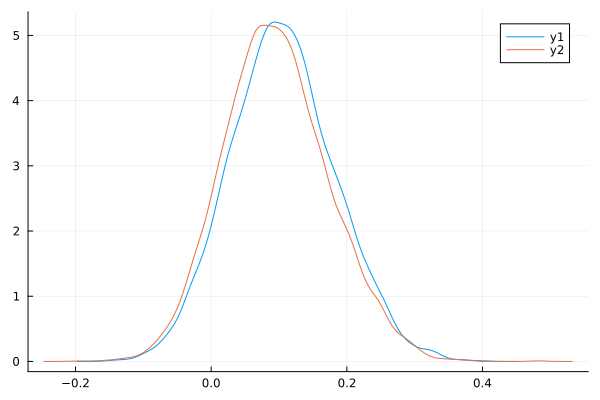

In [49]:
density(chain_2_optimistic[:effect_ai] |> vec)
density!(chain_2_pessimistic[:effect_ai] |> vec)

We don't see much of a difference in effects.